# Pricing Exploratory Data Analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jmspack.utils import (apply_scaling,
                          JmsColors)
from jmspack.ml_utils import plot_confusion_matrix

from dtw import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [2]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [3]:
# df = pd.read_csv("diabetes.csv")
df = sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
target = "species"

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plot the amount of rows in each side of the target

#### Looks like the target is imbalanced so this needs to be taken into account

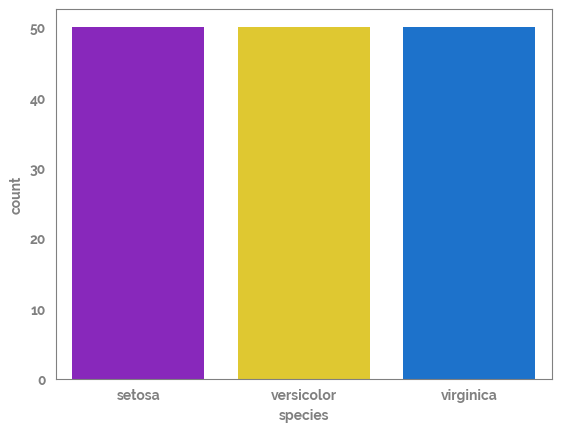

In [7]:
_ = sns.countplot(x=df[target])

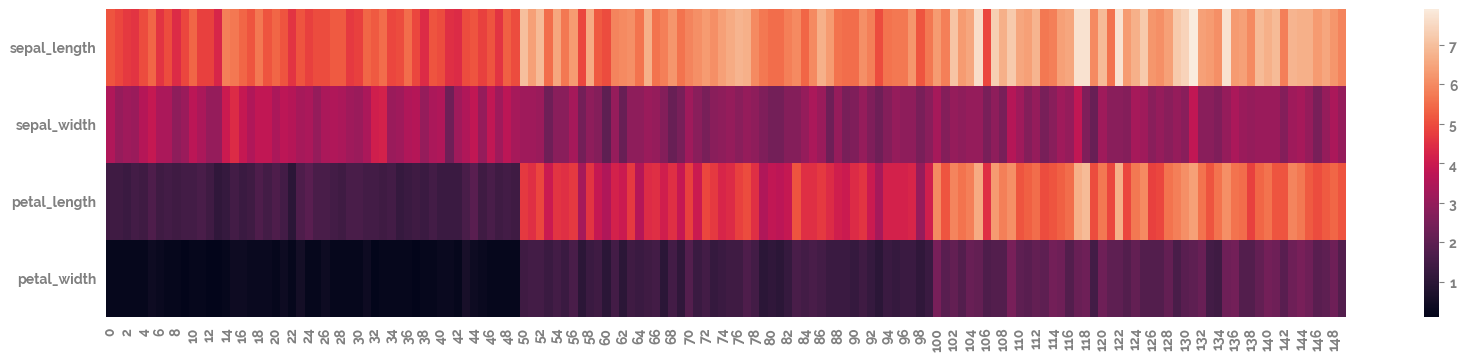

In [8]:
_ = plt.figure(figsize=(20, 4))
_ = sns.heatmap(df.drop(target, axis=1).T)

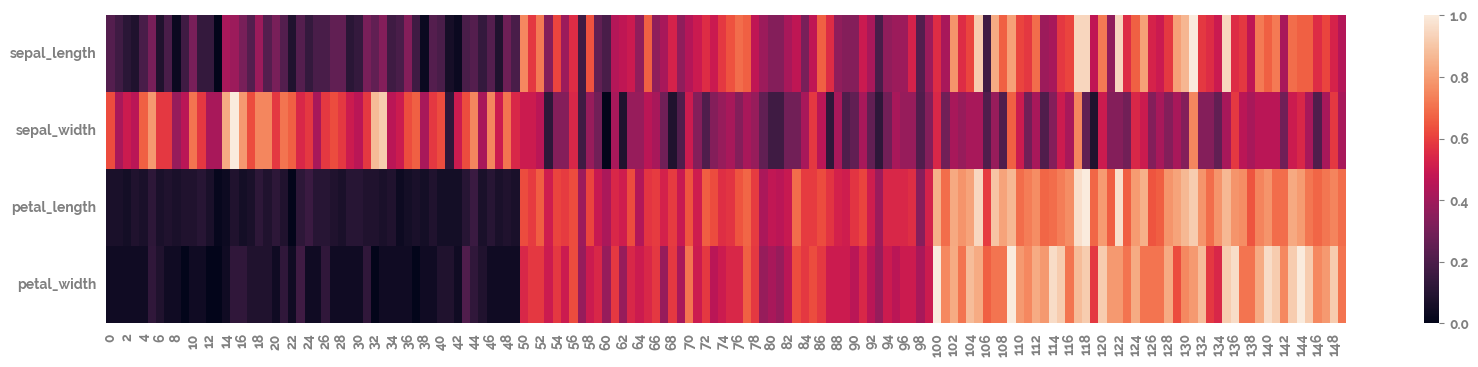

In [9]:
_ = plt.figure(figsize=(20, 4))
_ = sns.heatmap(df
                .drop(target, axis=1)
                .pipe(apply_scaling)
                .T)

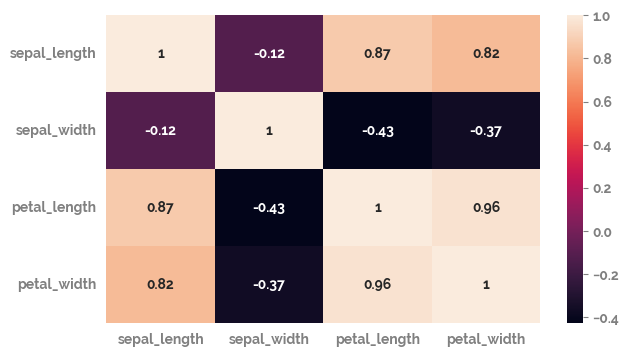

In [10]:
_ = plt.figure(figsize=(7, 4))
_ = sns.heatmap(df.corr(), annot=True)

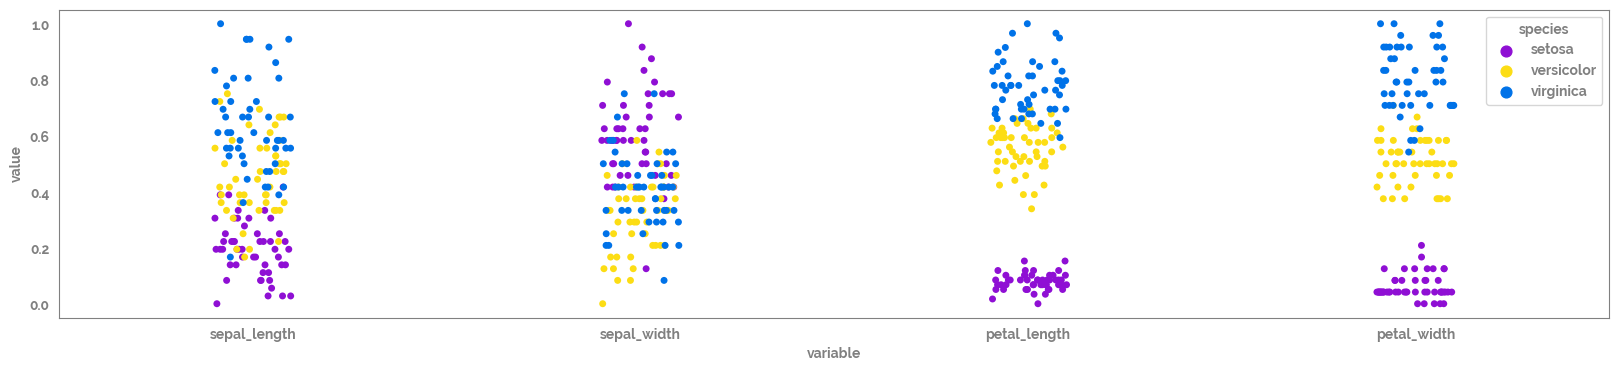

In [11]:
_ = plt.figure(figsize=(20, 4))
_ = sns.stripplot(data=df
                .set_index(target)
                .pipe(apply_scaling, "MinMax")
                .reset_index()
                .melt(id_vars = target),
                x = "variable",
                y = "value",
                hue = target,)

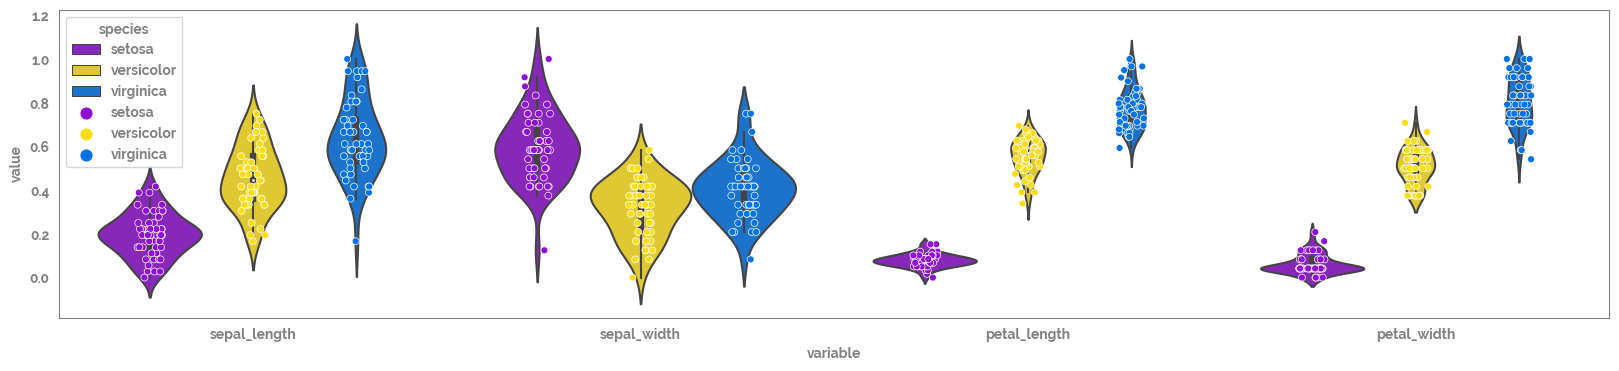

In [12]:
_ = plt.figure(figsize=(20, 4))
_ = sns.violinplot(data=df
                .set_index(target)
                .pipe(apply_scaling, "MinMax")
                .reset_index()
                .melt(id_vars = target),
                x = "variable",
                y = "value",
                hue = target,
               )
_ = sns.stripplot(data=df
                .set_index(target)
                .pipe(apply_scaling, "MinMax")
                .reset_index()
                .melt(id_vars = target),
                x = "variable",
                y = "value",
                hue = target,
                edgecolor='white',
    linewidth=0.5,
                  dodge=True
               )

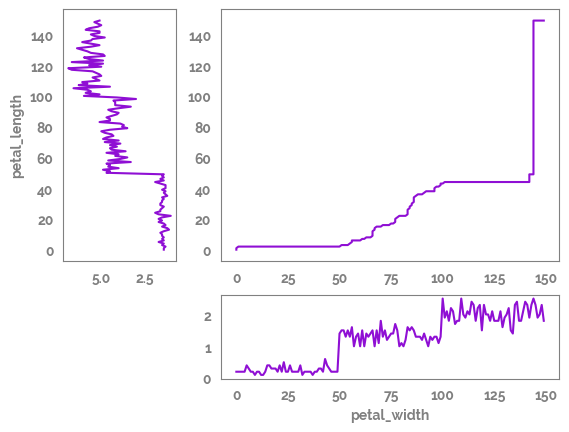

In [22]:
feature_1 = "petal_width"
feature_2 = "petal_length"
query = df[feature_1].values
template = df[feature_2].values

## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
_ = alignment.plot(type="threeway", xlab=feature_1,
    ylab=feature_2)

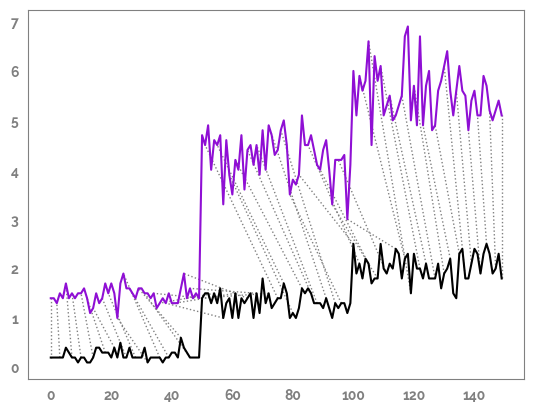

In [23]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
_ = dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=0)

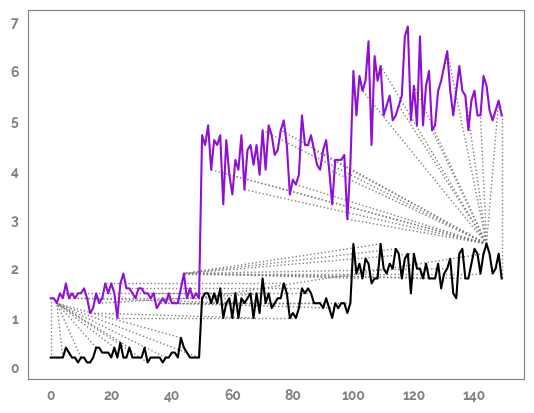

In [24]:
_ = alignment.plot(type="twoway")

In [26]:
X = df.drop(target,axis=1)
y = df[target]

In [31]:
clf = RandomForestClassifier(random_state=42)
kfold = KFold(n_splits=2, shuffle=True, random_state=1)

>Train: 0=0, 1=0, Test: 0=0, 1=0


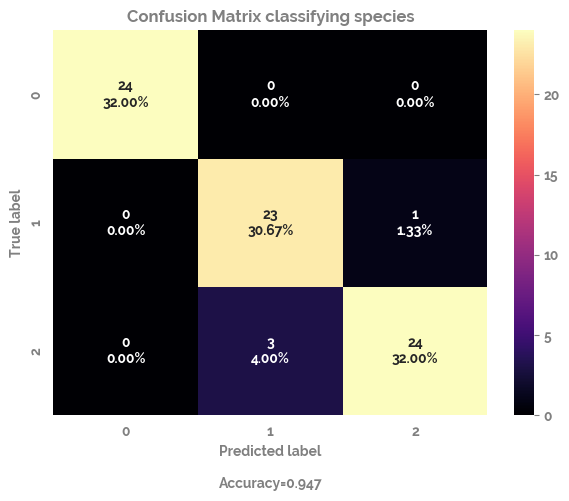

>Train: 0=0, 1=0, Test: 0=0, 1=0


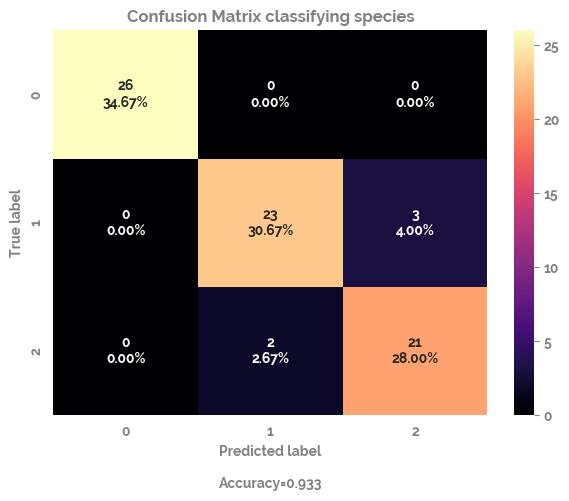

In [32]:
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X):
    # select rows
    train_X, test_X = X.loc[train_ix, :], X.loc[test_ix, :]
    train_y, test_y = y.loc[train_ix], y.loc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    _ = clf.fit(X = train_X, 
                y = train_y)
    
    pred_y = clf.predict(test_X)
    cf_matrix = confusion_matrix(test_y, pred_y)
    
    _ = plot_confusion_matrix(cf=cf_matrix, 
                      title=f"Confusion Matrix classifying {target}",
                     sum_stats=True,
                             cmap="magma")
    _ = plt.show()